In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle(r"C:\Users\PIYUSH\Desktop\pickle\clean.pkl")
data

,transcript
Vir,i lost of my mind its very freeing you should...
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,armed with boyish charm and a sharp wit the fo...


In [6]:
full_names = ['Vir das','Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Mike Birbiglia', 'Ricky Gervais']
data['full_names']=full_names
data

,transcript,polarity,subjectivity,full_names
Vir,i lost of my mind its very freeing you should...,0.097299,0.496523,Vir das
ali,ladies and gentlemen please welcome to the sta...,0.066765,0.479597,Ali Wong
anthony,thank you thank you thank you san francisco th...,0.045507,0.565955,Anthony Jeselnik
bill,all right thank you thank you very much thank...,0.008257,0.543996,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,0.073695,0.553921,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,-0.005095,0.515816,Dave Chappelle
hasan,whats up davis whats up im home i had to bri...,0.080180,0.464121,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,0.038131,0.538653,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,0.005476,0.556626,Joe Rogan
john,armed with boyish charm and a sharp wit the fo...,0.074283,0.490400,John Mulaney


In [7]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)

In [8]:
data

,transcript,polarity,subjectivity,full_names
Vir,i lost of my mind its very freeing you should...,0.097299,0.496523,Vir das
ali,ladies and gentlemen please welcome to the sta...,0.066765,0.479597,Ali Wong
anthony,thank you thank you thank you san francisco th...,0.045507,0.565955,Anthony Jeselnik
bill,all right thank you thank you very much thank...,0.008257,0.543996,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,0.073695,0.553921,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,-0.005095,0.515816,Dave Chappelle
hasan,whats up davis whats up im home i had to bri...,0.080180,0.464121,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,0.038131,0.538653,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,0.005476,0.556626,Joe Rogan
john,armed with boyish charm and a sharp wit the fo...,0.074283,0.490400,John Mulaney


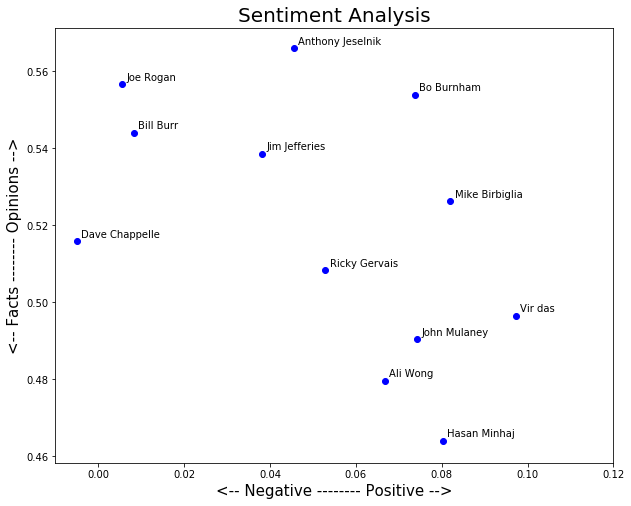

In [10]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_names'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()